# Introduction mathématique aux reseaux de neurones et codage d'un reseau simple

## Description du projet

Ce dossier a pour objectif de d'apprendre à ses lecteurs comment fonctionne un réseau de neurones classique. Nous passerons par la dimension mathématiques et nous utiliserons python pour appliquer et visualiser ce que l'on a appris. Pour comprendre le fonctionnement de réseaux de neurones (RN) nous fabriquerons un RN capable de reconnaître des chiffres écrits à la main.
## 1.Structure
---
![reseau-de-neurones](image/NN.png)
---

### On définit plusieurs termes:
- **un neurone est d'abord un réel compris entre 0 et 1**
- **les poids (weights notés w1 ...wn) qui sont associers à chaque arêtes, ils appartiennent à R (les réels)**
- **les données d'entrée (x1 ... xk) sont les données qu'on fournit à notre RN, dans l'exemple de la reconnaisance de chiffre à partir d'une image en nuance de gris ils représentent un pixel et un chiffre entre 0 et 1 ou 0 est un pixel blanc et 1 un pixel noir**
- **Nous avons ensuite des couches cachées (hidden layers), ces couches permettent de faire des calculs qu'on détaillera plus tard, notre RN aura 2 couches internes**
- **la couche de sortie (output layer) renvoie un nombre entre 0 et 1 pour chaque neurone, il y a autant de neurones à la sortie que de réponses envisagées. Dans notre exemple, notre RN aura 10 neurones dans sa couche de sortie**
- **La fonction sigmoïde ou fonction logistique est une fonction (appelée fonction d'ativation) qui va de R dans [0,1]**

![fonction](image/fonction-sigmoide.png)

- **le biais est un réel qui permet d'éviter l'activation de certains neurones en dessous d'une certaine valeur (noté b1 ... bn). Ainsi le neurone s'active si et seulement si (ssi) la somme(S définit ci-dessous) est supérieur à ce biais. D'ou la soustraction**


$$ S = \left(\sum_{i=1}^{n} w_i x_i\right) $$


### Interconnection entre un neurone de la couche n+1 et tout les neurones de la couche n
La valeur d'un neurones de la couche n dépend entièrement de neurones précédents, cette valeur est définie par la formule:

$$ S = f(\left(\sum_{i=1}^{n} w_i x_i\right) +b) $$

f est ainsi la fonction d'activation (nous utiliserons la fonction sigmoïde) et les autres valeurs ont été introduites.


### Écriture:
Il est très courant d'écrire un réseau de neurones avec les notations et indices introduits dans le premier graphique. On notera aussi:

$$ a^{(n)} = f\left(W \cdot a^{(n-1)} + b^{(n)}\right) $$

avec $$  a^{(n)} =\begin{bmatrix}
  a_1^{(n)} \\
  a_2^{(n)} \\
  a_3^{(n)} \\
  \vdots \\
  a_k^{(n)}
\end{bmatrix} $$


et $$ W = \begin{bmatrix}
    w_{11} & w_{12} & \cdots & w_{1n} \\
    w_{21} & w_{22} & \cdots & w_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    w_{n1} & w_{n2} & \cdots & w_{nn} \\
\end{bmatrix} $$



### Deuxième définition du neurone 
On peut définir un neurone comme une fonction:
$$ h : \mathbb{R}^p \rightarrow \mathbb{R} $$

### Conclusion partielle:

On a appris la structure et comment les valeurs des neurones sont determinées dans un réseau de neurones. Celles-ci dépendent des valeurs de poids et de biais mais si on prend ces valeurs, comment alors les choisir? C'est ce qu'on va aborder dans cette deuxième partie.

### Teste et exercice

Pour vous entraînez vous pouvez créer un réseau de neurones en suivant toutes les définitions données. vous trouverez la base de donnée des écritures à la main des chiffres ici: https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/ depuis j'ai moi même codé ce RN simple et non vraiment fonctionnel car on n'entraine pas ce réseau. Touver ce fichier dans reseau.py. Je vous explique les étapes:


Tout d'abord on introduit la fonction qui fait le formatage des fichiers, la première fonction récupère le fichier base de données et sépare les données car la premiere colonne est le chiffre qui doit être obtenu (on en a pas besoin dans un premier temps, j'expliquerai après cette encodage) et le reste est une liste de 784 valeurs qui représentent les pixels de l'images:

In [1]:
import pandas as pd

def charger_mnist_format_liste(fichier_csv):
    """
    Cette fonction lit un fichier CSV de données MNIST et retourne une liste d'images,
    où chaque image est une liste de 784 valeurs de pixels normalisées entre 0 et 1.

    :param fichier_csv: Chemin vers le fichier CSV contenant les données MNIST
    :return: Liste de listes de valeurs de pixels normalisées, chaque sous-liste contient 784 valeurs


    """
    # Charger le fichier CSV dans un DataFrame
    df = pd.read_csv(fichier_csv, header=None)
    
    # Récupérer les valeurs de pixels sans le label (première colonne) et normaliser entre 0 et 1
    images = (df.iloc[:, 1:] / 255).values.tolist()  # Diviser chaque pixel par 255 pour normaliser
    label = (df.iloc[:, :1]).values.tolist() 
    for i in range(len(label)):
        label[i]=from_label_to_number(label[i][0])
    return images, label


def from_label_to_number(chiffre):
    """
    Prend un chiffre entre 0 et 9 et retourne son encodage one-hot, c'est le nom de cette ecriture des nombres.

    :param chiffre: Un entier entre 0 et 9
    :return: Une liste représentant l'encodage one-hot du chiffre
        
    exemple:
    0: Résultat attendu: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    5: Résultat attendu: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    """
    if 0 <= chiffre <= 9:
        one_hot = [0] * 10
        one_hot[chiffre] = 1
        return one_hot
    else:
        raise ValueError("Le chiffre doit être entre 0 et 9")

On peut ensuite creer deux classes: une premiere classe c'est la ou on va mettre toutes nos fonctions:

In [2]:
"""
Ce code initialisera correctement le réseau avec des biais et des 
poids aléatoires, calculera la sortie pour chaque couche, et renverra
la sortie finale du réseau.
"""

## importation
from math import *
import matplotlib.pyplot as plt
import numpy as np


def fonction_sigmoid(x): #fonction sigmoide comme introduite
    return (1/(1+exp(-x)))

def fonction_neurone(i,j, biais,poid,Matrice_des_neurones): 
    """
    parametre:
    L: matrice des valeurs de tout les neurones
    i+1: numéro de la couche: 3 couche de sortie
    j: indice du neurone dans sa couche
    """
    S=0
    biais_ = biais[i-1][j]
    for k in range(len(Matrice_des_neurones[i-1])):
        S += (poid[i-1][j][k])*Matrice_des_neurones[i-1][k] #i-1-ème couche, j-ème neurone de la couche i, k-ième poid du neurone j
    S+= -biais_
    a = fonction_sigmoid(S + biais_)
    return a


def predire(picture, biais, poid,nombre_neurone):
    """
    on parcourt et remplit simplement notre Matrice_des_neurones
    """
    Matrice_des_neurones = [[0 for _ in range(nombre_neurone[i])] for i in range(len(nombre_neurone))] # ce n'est pas vraiment une matrice en vrai

    Matrice_des_neurones[0]= picture

    for i in range(1,len(Matrice_des_neurones)):
        for j in range(len(Matrice_des_neurones[i])):
            a_i_j =fonction_neurone(i,j, biais, poid,Matrice_des_neurones)
            Matrice_des_neurones[i][j]=a_i_j
    return Matrice_des_neurones[-1]

Ensuite, notre derniere classe est la classe principale, on va ici tout initialiser, et tout commander:

In [3]:
import random as rd



##initialisation
# Exemple d'utilisation
fichier = "database/mnist_train.csv"  # Remplace par le chemin de ton fichier
pictures,labels = charger_mnist_format_liste(fichier)#liste de 784 valeurs qui definisent l'image de 28*28 qui represente un nombre



nombre_layer=2 # nombre de couche 
nombre_neurone = [0 for _ in range(nombre_layer+2)] #disons 16 neurones par couches mais c'est comment vous voulez
nombre_neurone[0]=784
nombre_neurone[1]=16
nombre_neurone[2]=16
nombre_neurone[3]=10

biais= [] # on les définit aléatoirement:
biais.append([rd.randint(0, 5) for _ in range(16)])
biais.append([rd.randint(0, 5) for _ in range(16)])
biais.append([rd.randint(0, 5) for _ in range(10)])

poids = [] # de même
poids.append([[rd.randint(-1, 1) for _ in range(784)] for _ in range(16)])
poids.append([[rd.randint(-1, 1) for _ in range(16)] for _ in range(16)])
poids.append([[rd.randint(-1, 1) for _ in range(16)] for _ in range(10)])

couche_sortie = [0 for _ in range(10)]





if __name__ == '__main__':
    print(predire(pictures[0],biais,poids,nombre_neurone))
    #print(fonction_cout(picture, biais, poid,nombre_neurone, label))

[0.6792118648043965, 0.856363531575405, 0.4070098307988995, 0.9687023326403335, 0.6157504143525345, 0.9692232352362534, 0.42131960288737447, 0.050602728109361825, 0.09311803086046624, 0.6975311182788756]


Les résultats sont très confus on a pas de réponses très frange.

## 2.Comment choisir les valeurs de poids et de biais:

### Entraînement d'un réseau de neurones

### Introduction de la fonction Coût
Supposons que nous prenons des valeurs de biais et des poids aléatoires. Les résultats seront alors très confus comme on l'a vu en partie1. On introduit alors la fonction coût

$$ C : \mathbb{R}^p \rightarrow \mathbb{R}, \quad 
(w_{111}, w_{112}, \ldots, w_{nmp},b_{11},b_{12}, \ldots,,b_{np}) \mapsto \left(\sum_{i=1}^{p} (y_i-z_i )^2\right) $$

Avec $$ y_i =g(w_{111}, w_{112}, \ldots, w_{nmp},b_{11},b_{12}, \ldots,,b_{np}) $$


avec g la fonction qui donne la valeur de y_i à travers le réseau de nerones,  z_i nul sauf pour la valeur qu’on est censé obtenir à la fin. Dans l’exemple précedent si les données d’entrées correspondent à un 9 alors z_10 = 1 et les autres sont nulles. Ainsi plus la fonction coût est petite plus le reseau est bon. Evidemment pour exécuter cette fonction on est cencé avoir avoir les résultats attendus d'ou la nécésité de disposer de données d'entrainement. Pour information dans notre exemple la fonction prend en arguement 13.002 éléments.

Un autre indicateur est la moyenne sur toutes les données d'entrainement de cette fonction. On cherche bien evidemment à le diminuer

On comprend l'intérêt de trouver les valeurs qui minimisent ces indicateurs. Plus spéfiquement si le cout moyen est diminué alors l'ensemble du RN est optimisé. Vous pouvez implementez cette fonction coût en python vous aussi. 


In [6]:
def avr(L):
    av=0
    for e in L:
        av +=e

    return av/(len(L))


def fonction_cout(picture, biais,poid,nombre_neurone, label):
    costs = []
    for j in range(len(picture)//8):
        cost=0
        sorti = predire(picture[j], biais,poid,nombre_neurone)
        for i in range(len(sorti)):
            cost += (sorti[i] -label[j][i])**2
        costs.append(cost)
    return avr(costs)

In [7]:
if __name__ == '__main__':
    print(fonction_cout(pictures, biais, poids,nombre_neurone, labels))

4.363474527455258



D'ailleurs cette fonction nous permet de comprendre l'entéret de l'encodage hot-one (précedent introduit): cette encodage qui est très fréquence en RN permet à un nombre d'être traduit en vecteur: par exemple:
    0: Résultat attendu: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    5: Résultat attendu: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Ainsi pour appelé la fonction cout il est plus pratique de lui fournir le résultat attendu dans ce format.

### Méthodes de minimisation: descente de gradiant

#### en 1D

Juste pour l'évoquer en 1D: On peut penser à dériver mais c'est pas toujours possible, on peut alors utiliser les méthodes d'euler ou de newton. On imagine bien que le cas 1D n'arrive pas.

#### en 2D et plus: La descente de gradiant

Pour ceux qui ne sont pas familier avec le concept de descente de gradient chez les fonctions à plusieurs vairables, on pourrait expliquer ça par la recherche en un point donné de la direction vers laquelle notre fonction va le plus décroite. Je va calculer ce gradient jusqu'à que la fonction cout moyen en dessous d'une certaine valeur (comme pour la méthode d'euler et newton nous n'arriverons pas à un 0 stricte). Ce gradient est calculé par la méthode de backpropagation qui est considéré comme le centre de l'apprentissage des RN. Ainsi quand on parle d'un RN qui apprend, on veut dire qu'il minimise sa fonction coût. 
La méthode de descente de gradiant permet de savoir quelles biais et poids doivent être augmentés ou baissés et à quelle force. Cette méthode nous donnera un vecteur colonne avec des valeurs positive ou négative et de même longueur que le nombre de biais et de poids.

prenons un exemple en 2D pour comprendre et visualiser.


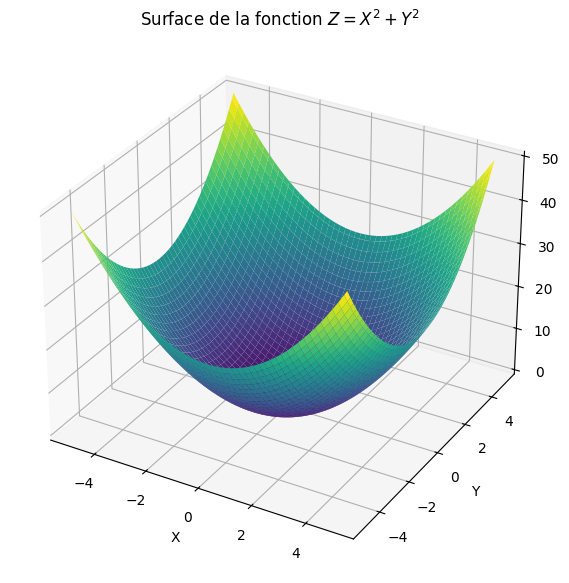

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des valeurs pour X et Y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculer les valeurs de Z pour la fonction Z = X^2 + Y^2
Z = X**2 + Y**2

# Affichage de la surface 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis")

# Titre et étiquettes des axes
ax.set_title("Surface de la fonction $Z = X^2 + Y^2$")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Afficher la figure
plt.show()

Ainsi calculons le gradiant de cette fonction en (1,1), on obtient alors le vecteur (2,2). Ce vecteur pointe alors vers l'endroit de la pente la plus raide, l'impacte est alors le même si on modifie (x,y) pareilement. Mais si on prend le point (1/2,1), on observe alors qu'il faut qu'on fasse une modification deux fois plus importe sur x que y pour arriver au même stade. On mets ici en exergue l'impacte différent de certains poid par rapport à d'autre. En outre certains point aurons plus d'etre modifier avec plus de force que d'autre.

On peut afficher ce gradient en 2D.

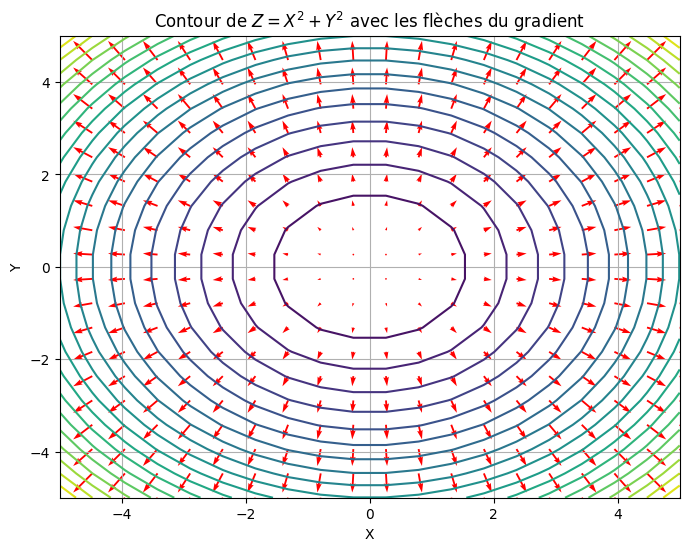

In [5]:
# Affichage en 2D pour illustrer le gradient de la fonction Z = X^2 + Y^2

# Générer une grille pour le calcul du gradient
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Calculer les composantes du gradient
U = 2 * X  # dZ/dX = 2X
V = 2 * Y  # dZ/dY = 2Y

# Affichage du champ de gradient en 2D
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap="viridis")  # Courbes de niveau pour la fonction Z = X^2 + Y^2
plt.quiver(X, Y, U, V, color='red')  # Flèches du gradient

# Titres et étiquettes des axes
plt.title("Contour de $Z = X^2 + Y^2$ avec les flèches du gradient")
plt.xlabel("X")
plt.ylabel("Y")

# Afficher la figure
plt.grid(True)
plt.show()


### Backpropagation

#### explication:

C'est un algorithme détermine comment un seul entrainement désire modifier l'ensemble biais + poids. Ils donnent ainsi quelles améliorations provoquent un les effet les plus rapides. Pour ce faire on prend les valeurs (y1 ... yn) de sortie une par une et on regarde l'ensemble poids, biai, et activation(n-1), on sait par ailleurs si ce (y1 ... yn) doit augementer ou baisser et avec quelle intensité:

##### Tout d'abord l'ensemble poids + biai: 
On se focalise ainsi sur les arêtes les plus fortes (celle dont le produit w_i*a_i est le plus élevé) est on cherche à augementer ou baisser w_i en fonction de si on doit augementer ou baisser la valeur d'activation de sorti. L'augmentation de w_i est ainsi proportiennel à l'augementation des a_i

##### Ensuite l'ensemble activation(n-1: la couche précedent)
On se focalise aussi sur les arêtes les plus fortes que ce soit en négatif ou positif et on vient émettre la volonté (volonté car on ne peut pas changer les activation) ou non de augementer ou baisser a_i. Encore une fois l'augmentation de w_i est ainsi proportiennel à l'augementation des a_i. Cependant il ne faut pas oublier que il faut prendre en compte la volonté de tout les neurones de changé les a_i. On somme ainsi tout les désire des neurones pour avoir une liste de ce qu'il faut regarder sur la liste précedente. 

On applique récursivement ce procesus sur les neurones précedents jusqu'à remonter aux neurones d'entrés. On modifie alors les poids et les biais ici pour au mieux impacter les neurones de sortis

#### Qu'est ce que ça donne en terme de math:
